# Tarea Examen 1

In [1]:
from numpy import *
from matplotlib.pyplot import *
%matplotlib inline

## Ejercicio 1

Se tiene un oscilador armónico en 2 dimensiones en que la fuerza es $\vec F_{osc} = -k\vec r$ y  se tiene una fricción $\vec f_{fric} = -\gamma \vec{v}$ si $|\vec v| < 1$, pero cuando  $|\vec v| > 1$ la fricción es $\vec f_{fric} = -\mu |\vec v|^{1/2}\vec{v}$. Consideremos una partícula de masa $m=1$ y los parámetros fijos $\gamma = 0.1$ y $\mu=0.2$.

Notemos que la fuerza de fricción se puede escribir de forma general como $\vec f_{fric} = - \alpha |\vec v|^{\beta} \vec {\dot r}$. Donde $\alpha = \{\gamma, \mu\}$ y $\beta = \{0,\frac12\}$



Las ecuaciones de movimiento son:
\begin{align}
m \vec{ \ddot r }&= \vec F_{osc} + \vec f_{fric}\\
\vec{\ddot r} &= -\frac{k}{m} \vec r - \frac{\alpha}{m} |\vec v|^{\beta} \vec {\dot r}
\end{align}

### Coordenadas cartesianas
Escribiendo estas ecuaciones en coordenadas cartesianas tenemos
\begin{align}
\ddot x &= -\frac{k}{m} x - \frac{\alpha}{m} v^{\beta} \dot x\\
\ddot y &= -\frac{k}{m} y - \frac{\alpha}{m} v^{\beta} \dot y
\end{align}

Escrita en forma de sistema de ecuaciones ecuaciones de primer orden tenemos
\begin{align}
\dot x &= u_x\\
\dot y &= u_y\\
\dot u_x &= -\frac{k}{m} x - \frac{\alpha}{m} (u_x^2+u_y^2)^{\beta/2} u_x\\
\dot u_y &= -\frac{k}{m} y - \frac{\alpha}{m} (u_x^2+u_y^2)^{\beta/2} u_y
\end{align}

Con condiciones iniciales dados por
\begin{align}
x_0 &= 0\\
y_0 &= 1\\
u_{x0} &= \cos \theta\\
u_{y0} &= \sin \theta
\end{align}

### Coordenadas polares
Usando las relaciones siguientes:
\begin{align}
\vec r &= r \hat r\\
\vec {\dot r} &= \dot r \hat r + r \dot \theta \hat \theta\\
\vec {\ddot r} &= \ddot r \hat r + 2 \dot r \dot \theta \hat \theta + r \ddot \theta \hat \theta -r \dot \theta ^2 \hat r = ( \ddot r- r \dot \theta^2 ) \hat r + (2 \dot r \dot \theta + r \ddot \theta) \hat \theta
\end{align}

Podemos escribir las ecuaciones de movimiento en coordenadas polares
\begin{align}
\ddot r- r \dot \theta^2 &= - \frac{k}{m} r - \frac{\alpha}{m} (\dot r ^2 + r^2 \dot \theta ^2)^{\beta/2} \dot r\\
r\ddot \theta + 2 \dot r \dot \theta &= -\frac{\alpha}{m} (\dot r ^2 + r^2 \dot \theta^2)^{\beta/2}  r \dot \theta
\end{align}

Por lo tanto se tiene el siguiente sistema de ecuaciones
\begin{align}
\dot r &= v\\
\dot \theta &= \omega\\
\dot v &= r \omega^2- \frac{k}{m} r - \frac{\alpha}{m} (v^2 + r^2 \omega^2)^{\beta/2} v\\
\dot \omega &= -2 \frac{v \omega}{r} - \frac{\alpha}{m} (v^2 + r^2 \omega^2)^{\beta/2} \omega
\end{align}

Con las condiciones iniciales
\begin{align}
r_0 &= 1\\
\theta_0 &= \frac{\pi}{2}\\
v_0 &= \sin \theta\\
\omega_0 &= -\cos \theta
\end{align}

### Propiedades de la partícula
El momento angular de la partícula es 
$$L = r^2 \dot \theta$$

La energía mecánica de la partícula se define como $E = T + V$, por lo tanto
\begin{align}
E_{cart} &= \frac12 m (\dot{x}^2+\dot{y}^2) + \frac12 k (x^2+y^2)\\
E_{polar} &= \frac12 m (\dot{r}^2+L^2) + \frac12 k r^2
\end{align}

In [47]:
def Energia(x, args):
    # args[0] = 0 --> cartesianas
    # args[0] = 1 --> polares
    # args[resto] = k, gamma, mu
    if args[0] == 0:
        return 0.5*(x[2]*x[2]+x[3]*x[3]) + 0.5*args[1]*(x[0]*x[0]+x[1]*x[1])
    else:
        return 0.5*(x[2]*x[2]+x[0]*x[0]*x[3]*x[3]) + 0.5*args[1]*x[0]*x[0]

# Se define el metodo de integracion
def RK4(ec, p_ini, x, h=0.1, args=[0.,1.,0.1,0.2]):
    # args[0] = 0 --> cartesianas
    # args[0] = 1 --> polares
    # args[resto] = k, gamma, mu
    tiempos = arange(x[0],x[1]+h,h)
    sol = zeros((len(tiempos),len(p_ini)))
    sol[0,:] = p_ini
    # Se calcula la energia del sistema al inicio
    E0 = Energia(p_ini, args)
    for i in xrange(len(tiempos)-1): 
        k1 = ec(sol[i,:],tiempos[i], args)
        k2 = ec(sol[i,:]+0.5*h*k1,tiempos[i]+0.5*h, args)
        k3 = ec(sol[i,:]+0.5*h*k2,tiempos[i]+0.5*h, args)
        k4 = ec(sol[i,:]+h*k3,tiempos[i]+h, args)
        sol[i+1,:] = sol[i,:] + h*(k1+2*k2+2*k3+k4)/6
        
        # Se calcula la energia para detener la simulacion si En < 0.01 E0
        En = Energia(sol[i+1,:], args)
        if En < 0.01*E0:
            tiempos = tiempos[:i]
            sol = sol[:i, :]
            return tiempos,sol
        
    return tiempos,sol

# Se define el sistema de ecuaciones diferenciales por resolver para coordenadas cartesianas
def ec_dif1_cart(x, t, args=[0.,1.,0.1,0.2]):
    # args[0] = 0 --> cartesianas
    # args[resto] = k, gamma, mu
    
    v = sqrt(x[2]*x[2]+x[3]*x[3])
    # Se determina la fuerza de friccion
    if v >= 1:
        f_fric = -args[3]*sqrt(v)*array([x[2],x[3]])
    else:
        f_fric = -args[2]*array([x[2],x[3]])
    
    dux = - args[1]*x[0]+f_fric[0]
    duy = - args[1]*x[1]+f_fric[1]
    return array([x[2], x[3], dux, duy])

# Se define el sistema de ecuaciones diferenciales por resolver para coordenadas polares
def ec_dif1_polar(x, t, args=[1.,1.,0.1,0.2]):
    # args[0] = 1 --> polares
    # args[resto] = k, gamma, mu
    
    v = sqrt(x[2]*x[2]+x[0]*x[0]*x[3]*x[3])
    # Se determina la fuerza de friccion
    if v >= 1:
        f_fric = -args[3]*sqrt(v)*array([x[2], x[3]])
    else:
        f_fric = -args[2]*array([x[2], x[3]])
    
    dur = x[0]*x[3]*x[3] - args[1]*x[0] + f_fric[0]
    dut = -2.0*x[2]*x[3]/x[0] + f_fric[1]
    
    return array([x[2], x[3], dur, dut])

### Coordenadas cartesianas

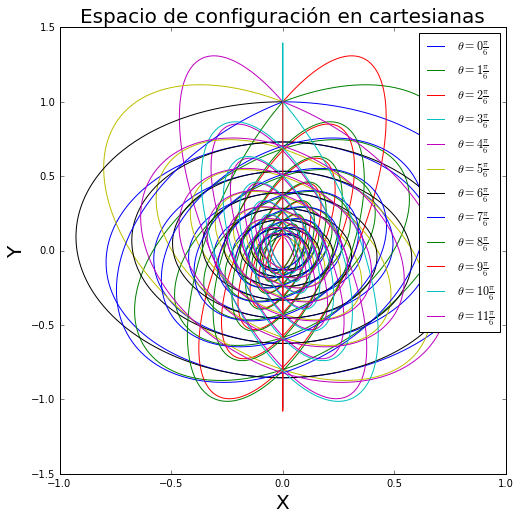

In [48]:
fig = figure(figsize=(8,8))
ax = fig.add_subplot(111)

theta = [n*pi/6. for n in range(12)]
N = 70
for i in range(len(theta)):
    cond_ini = array([0, 1, cos(theta[i]), sin(theta[i])])
    tiempo, sol = RK4(ec_dif1_cart, cond_ini, [0,N], 0.01, [0,1,0.1,0.2])
    
    # Se grafica el espacio de configuracion
    ax.plot(sol[:,0], sol[:,1], label="$ \\theta = "+str(i)+"\\frac{\pi}{6} $")
    ax.set_xlabel("X", fontsize=20); ax.set_ylabel("Y", fontsize=20)
    ax.set_title(u"Espacio de configuración en cartesianas", fontsize=20)
    ax.legend()

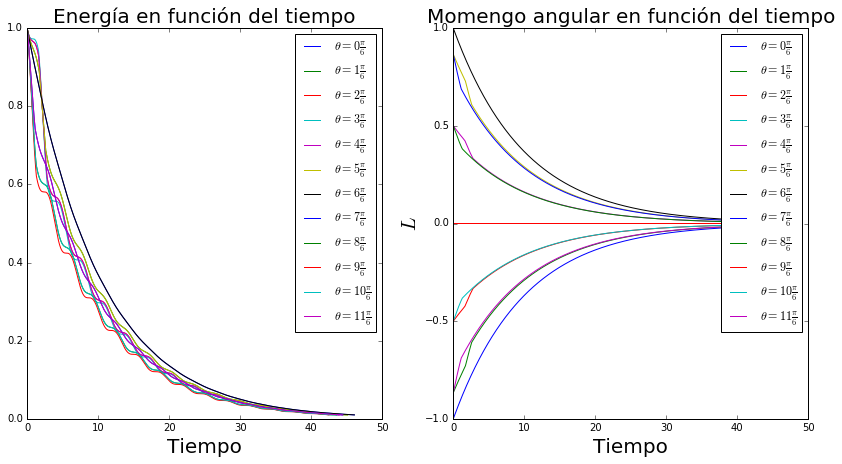

In [67]:
fig = figure(figsize=(14,7))
ax = fig.add_subplot(121)
bx = fig.add_subplot(122)

theta = [n*pi/6. for n in range(12)]
N = 70
for i in range(len(theta)):
    cond_ini = array([0, 1, cos(theta[i]), sin(theta[i])])
    tiempo, sol = RK4(ec_dif1_cart, cond_ini, [0,N], 0.01, [0,1,0.1,0.2])
    # Se grafica la energia en funcion del tiempo
    Energies = zeros_like(tiempo)
    for n in range(len(tiempo)): Energies[n] = Energia(sol[n,:], [0,1,0.1,0.2])
    ax.plot(tiempo, Energies, label="$ \\theta = "+str(i)+"\\frac{\pi}{6} $")
    ax.set_xlabel("Tiempo", fontsize=20); bx.set_ylabel("$E/E_0$", fontsize=20)
    ax.set_title(u"Energía en función del tiempo", fontsize=20)
    ax.legend()
    
    # Se grafica el momento angular en funcion del tiempo
    Mom_angular = zeros_like(tiempo)
    for n in range(len(tiempo)):
        Mom_angular[n] = sol[n,0]*sol[n,3]-sol[n,1]*sol[n,2]
    bx.plot(tiempo, Mom_angular, label="$ \\theta = "+str(i)+"\\frac{\pi}{6} $")
    bx.set_xlabel("Tiempo", fontsize=20); bx.set_ylabel("$L$", fontsize=20)
    bx.set_title(u"Momengo angular en función del tiempo", fontsize=20)
    bx.legend()

### Coordenadas polares

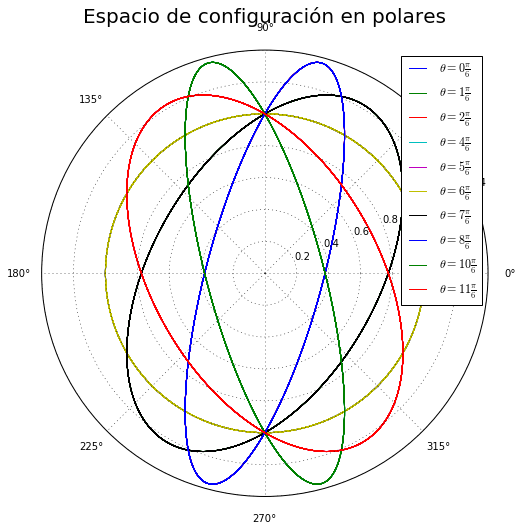

In [64]:
fig = figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='polar')

theta = [n*pi/6. for n in range(12)]
N = 70
for i in range(len(theta)):
    if abs(theta[i]%pi) != pi/2:
        cond_ini = array([1., pi/2., sin(theta[i]), -cos(theta[i])])
        tiempo, sol = RK4(ec_dif1_polar, cond_ini, [0,N], 0.01, [1,1.,0.0,0.0])

        # Se grafica el espacio de configuracion
        ax.plot(sol[:,1], sol[:,0], label="$ \\theta = "+str(i)+"\\frac{\pi}{6} $")
        ax.set_title(u"Espacio de configuración en polares", fontsize=20)
        ax.legend()

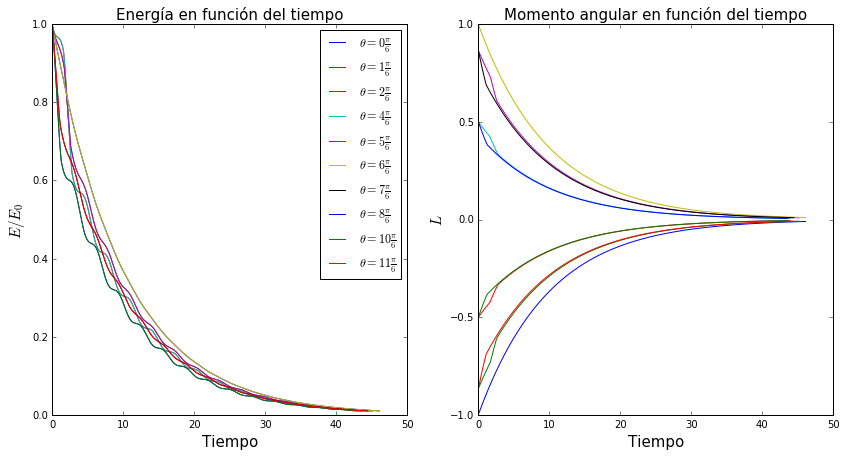

In [60]:
fig = figure(figsize=(14,7))
ax = fig.add_subplot(121)
bx = fig.add_subplot(122)

theta = [n*pi/6. for n in range(12)]
N = 70
for i in range(len(theta)):
    if abs(theta[i]%pi) != pi/2:
        cond_ini = array([1., pi/2., sin(theta[i]), -cos(theta[i])])
        tiempo, sol = RK4(ec_dif1_polar, cond_ini, [0,N], 0.01, [1,1.,0.1,0.2])
        # Se grafica la energia en funcion del tiempo
        Energies = zeros_like(tiempo)
        for n in range(len(tiempo)): 
            Energies[n] = Energia(sol[n,:], [1,1.,0.1,0.2])
        ax.plot(tiempo, Energies, label="$ \\theta = "+str(i)+"\\frac{\pi}{6} $")
        ax.set_xlabel("Tiempo", fontsize=15); 
        ax.set_ylabel("$E/E_0$", fontsize=15)
        ax.set_title(u"Energía en función del tiempo", fontsize=15)
        ax.legend()
        
        # Se grafica el momento angular en funcion del tiempo
        Mom_angular = zeros_like(tiempo)
        for n in range(len(Mom_angular)): 
            Mom_angular[n] = sol[n,0]*sol[n,0]*sol[n,3]
        bx.plot(tiempo, Mom_angular, label="$ \\theta = "+str(i)+"\\frac{\pi}{6} $")
        bx.set_xlabel("Tiempo", fontsize=15); 
        bx.set_ylabel("$L$", fontsize=15)
        bx.set_title(u"Momento angular en función del tiempo", fontsize=15)

### Espacios fase

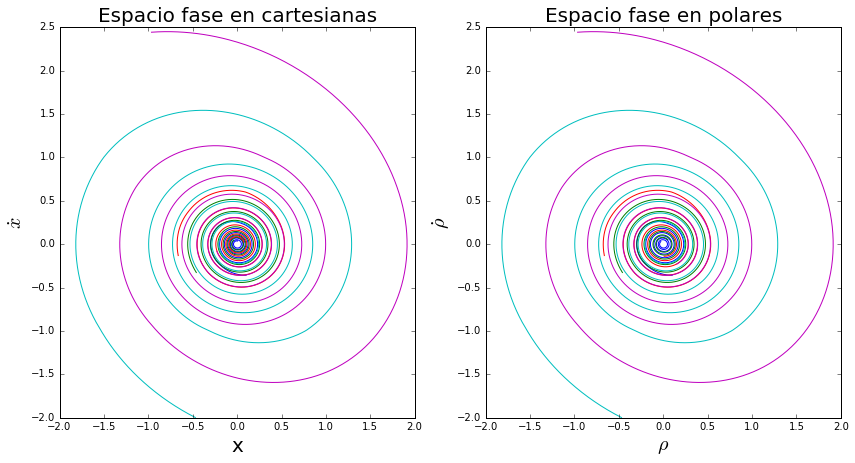

In [123]:
fig = figure(figsize=(14, 7))
ax = fig.add_subplot(121)
bx = fig.add_subplot(122)

N = 50
for n in range(5):
    cond_ini = random.randn(4)
    tiempo, sol_cart = RK4(ec_dif1_cart, cond_ini, [0,N], 0.01, [0,1,0.1,0.2])
    tiempo, sol_polar = RK4(ec_dif1_cart, cond_ini, [0,N], 0.01, [1,1,0.1,0.2])

    # Se grafica el espacio de fase en cartesianas
    ax.plot(sol_cart[:,0], sol_cart[:,2])
    ax.set_xlabel("x", fontsize=20); ax.set_ylabel("$\\dot x$", fontsize=20)
    ax.set_title(u"Espacio fase en cartesianas", fontsize=20)
    ax.legend()

    # Se grafica el espacio de fase en polares
    bx.plot(sol_polar[:,0], sol_polar[:,2])
    bx.set_xlabel("$\\rho$", fontsize=20); bx.set_ylabel("$\\dot \\rho$", fontsize=20)
    bx.set_title(u"Espacio fase en polares", fontsize=20)
    bx.legend()

## Ejericio 2

Supongamos que tenemos el problema anterior pero ahora la partícula se encuentra cargada y hay una carga del mismo signo en el origen.

El sistema de ecuaciones es el siguiente
\begin{align}
\dot r &= v\\
\dot \theta &= \omega\\
\dot v &= r \omega^2 - \omega_0^2 r -\frac{q^2}{m r^2} - \frac{\alpha}{m} (v^2 + r^2 \omega^2)^{\beta/2} v\\
\dot \omega &= -2 \frac{v \omega}{r} - \frac{\alpha}{m} (v^2 + r^2 \omega^2)^{\beta/2} \omega
\end{align}
Donde $\omega_0^2 = \frac{k}{m}$ es la frecuencia del oscilador.

### Sin fricción

Si no concideramos fricción, la partícula está sometida a aun potencial concervativo dado por:
$$ V(r) = \frac12 m \omega_0^2 r^2 - \frac{q^2}{r}$$

Notemos que como el potencial es central, el momento angular total se conserva y por lo tanto se puede considerar que la patícula está en en potencial efectivo dado por
$$ V_{ef}(r) = \frac{l^2}{2m r^2} + V(r) = \frac{l^2}{2m r^2} +\frac12 m \omega_0^2 r^2 - \frac{q^2}{r}$$

Notemos que para $r\approx 0$ y para $r \rightarrow \infty$ el potencial se va a infinito. Por lo que para toda energía permitida, $E \ge min(V_{ef})$, Se tiene una órbita cerrada!

In [83]:
def metodoNewton(func, x_ini, args, h=0.1, epsilon=1e-9):
    while abs(func(x_ini, args)) >= epsilon:
        d_func = (-func(x_ini+2*h, args)+8*func(x_ini+h, args)-8*func(x_ini-h, args)+func(x_ini-2*h, args))/(12*h)
        raiz = x_ini - func(x_ini, args)/d_func
        x_ini = raiz
    return raiz
    
def grad_v_ef(x, args=[1., 1., 1., 1.]):
    #args = [m, omega0, q2, l]
    return args[0]*args[0]*args[1]*args[1]*x*x*x*x+args[0]*args[2]*x-args[3]*args[3]

def V_ef(x, args=[1., 1., 1., 1.]):
    #args = [m, omega0, q2, l]
    return 0.5*args[3]*args[3]/(args[0]*x*x)+0.5*args[0]*args[1]*args[1]*x*x-args[2]/x

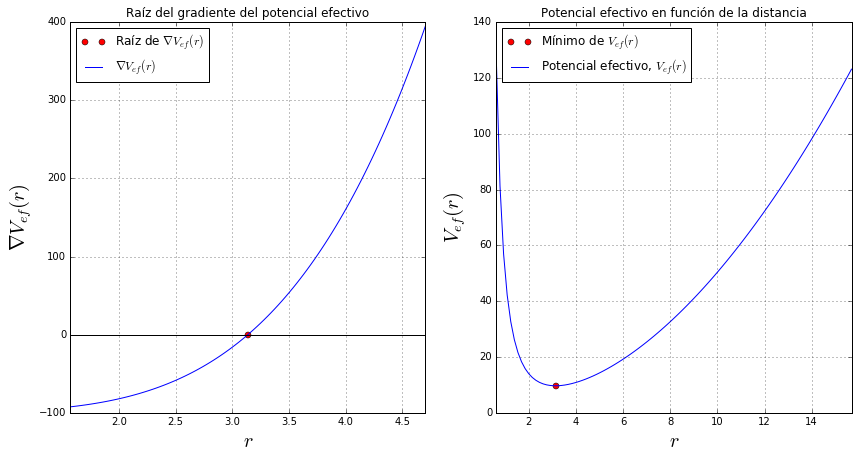

In [84]:
fig = figure(figsize=(14, 7))
ax = fig.add_subplot(121)
bx = fig.add_subplot(122)

args = [1., 1., 1., 10.]
#args = [m, omega0, q2, l]
r0 = metodoNewton(grad_v_ef, 0.1, args)
r = linspace(0.5*r0,1.5*r0,100)
r_ef = linspace(0.2*r0,5*r0,100)
Grad_V_ef = grad_v_ef(r, args)
V_ef_ = V_ef(r_ef, args)

ax.set_title(u"Raíz del gradiente del potencial efectivo")
ax.plot([r0],[0],'ro', label=u"Raíz de $\\nabla V_{ef}(r)$")
ax.plot(r, Grad_V_ef, label=u"$\\nabla V_{ef}(r)$")
ax.plot(r, zeros_like(r), color='black')
ax.set_xlabel("$r$", fontsize=20)
ax.set_ylabel("$\\nabla V_{ef}(r)$", fontsize=20)
ax.set_xlim(r[0],r[-1])
ax.grid(True)
ax.legend(loc='best')

bx.set_title(u"Potencial efectivo en función de la distancia")
bx.plot([r0], [V_ef(r0, args)], 'ro', label=u"Mínimo de $V_{ef}(r)$")
bx.plot(r_ef, V_ef_, label="Potencial efectivo, $V_{ef}(r)$")
bx.set_xlabel("$r$", fontsize=20)
bx.set_ylabel("$V_{ef} (r)$", fontsize=20)
bx.set_xlim(r_ef[0],r_ef[-1])
bx.grid(True)
bx.legend(loc='best');

El sistema de ecuaciones es el siguiente
\begin{align}
\dot r &= v\\
\dot \theta &= \omega\\
\dot v &= r \omega^2 - \omega_0^2 r -\frac{q^2}{m r^2} - \frac{\alpha}{m} (v^2 + r^2 \omega^2)^{\beta/2} v\\
\dot \omega &= -2 \frac{v \omega}{r} - \frac{\alpha}{m} (v^2 + r^2 \omega^2)^{\beta/2} \omega
\end{align}
Donde $\omega_0^2 = \frac{k}{m}$ es la frecuencia del oscilador.


In [41]:
## Se define el sistema de ecuaciones diferenciales por resolver para coordenadas polares
def ec_dif2_polar(x, t, args=[1.,1.,1.,0.1,0.2]):
    # args[0] = 1 --> polares
    # args[resto] = m, omega0, q2, gamma, mu
    
    v = sqrt(x[2]*x[2]+x[0]*x[0]*x[3]*x[3])
    # Se determina la fuerza de friccion
    if v >= 1:
        f_fric = -args[-1]*sqrt(v)*array([x[2], x[3]])
    else:
        f_fric = -args[-2]*array([x[2], x[3]])
    
    dur = f_fric[0]/args[1] + x[0]*x[3]*x[3] - args[2]*x[0] - args[3]/(args[1]*x[0]*x[0])
    dut = f_fric[1]/args[1] - 2.0*x[2]*x[3]/x[0]
    
    return array([x[2], x[3], dur, dut])

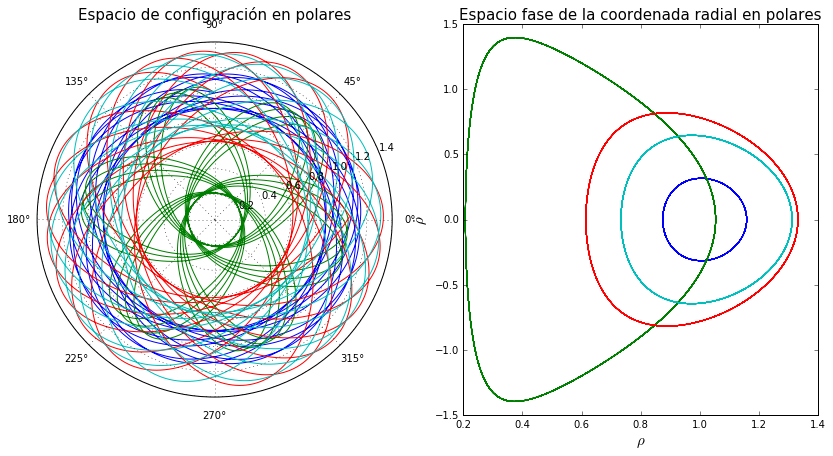

In [111]:
fig = figure(figsize=(14,7))
ax = fig.add_subplot(121, projection='polar')
bx = fig.add_subplot(122)

N = 50
for i in range(4):
    cond_ini = array([1., pi/2., random.rand(), 0.5+random.rand()])
    tiempo, sol = RK4(ec_dif2_polar, cond_ini, [0,N], 0.005, [1.,1.,1.,1.,0.,0.])
    # Se grafica el espacio de configuracion
    ax.plot(sol[:,1], sol[:,0])
    ax.set_title(u"Espacio de configuración en polares", fontsize=15)
    
    # Se grafica el espacio fase
    bx.plot(sol[:,0], sol[:,2])
    bx.set_title(u"Espacio fase de la coordenada radial en polares", fontsize=15)
    bx.set_xlabel("$\\rho$", fontsize=15)
    bx.set_ylabel("$\\dot \\rho$", fontsize=15)

Como podemos notar en el espacio fase de $\rho$ las órbitas son cerradas.

### Con fricción

Si se incluye fricción al sistema uno esperaría que no hubiera órbitas cerradas ya que la energía mecánica del sistema disminuye. Por lo que para órbitas con radios "grandes", disminuiran el radio de la órbita hasta que la intección de Coulomb tenga un efecto notable. En ese punto el factor $\frac{1}{r^2}$ hará que la órbita "explote".

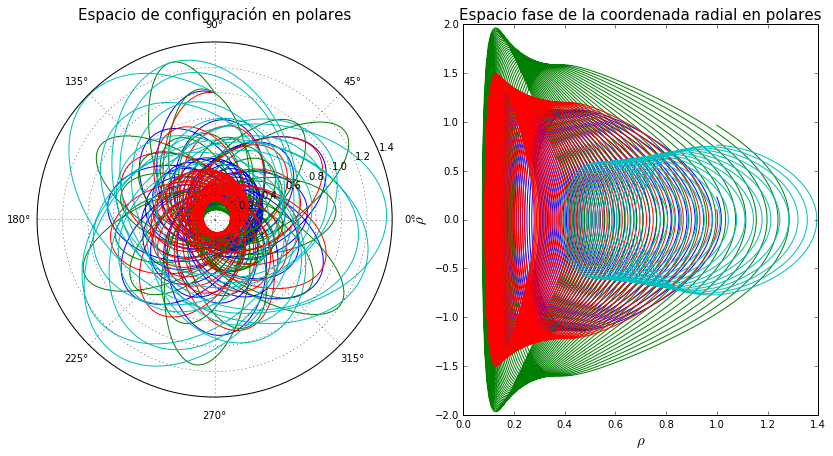

In [116]:
fig = figure(figsize=(14,7))
ax = fig.add_subplot(121, projection='polar')
bx = fig.add_subplot(122)

N = 50
for i in range(4):
    cond_ini = array([1., pi/2., random.rand(), 0.5+random.rand()])
    tiempo, sol = RK4(ec_dif2_polar, cond_ini, [0,N], 0.005, [1.,1.,1.,1.,0.01,0.01])
    # Se grafica el espacio de configuracion
    ax.plot(sol[:,1], sol[:,0])
    ax.set_title(u"Espacio de configuración en polares", fontsize=15)
    
    # Se grafica el espacio fase
    bx.plot(sol[:,0], sol[:,2])
    bx.set_title(u"Espacio fase de la coordenada radial en polares", fontsize=15)
    bx.set_xlabel("$\\rho$", fontsize=15)
    bx.set_ylabel("$\\dot \\rho$", fontsize=15)

Como podemos ver en el espacio fase de $\rho$ la órbita no es cerrada. Además podemos notar como el sistema evoluciona disminuyendo $\rho$ y aumentando $\dot \rho$.

Si aumentamos el coeficiente de fricción, podemos notar que el sistema se destruye mucho antes.

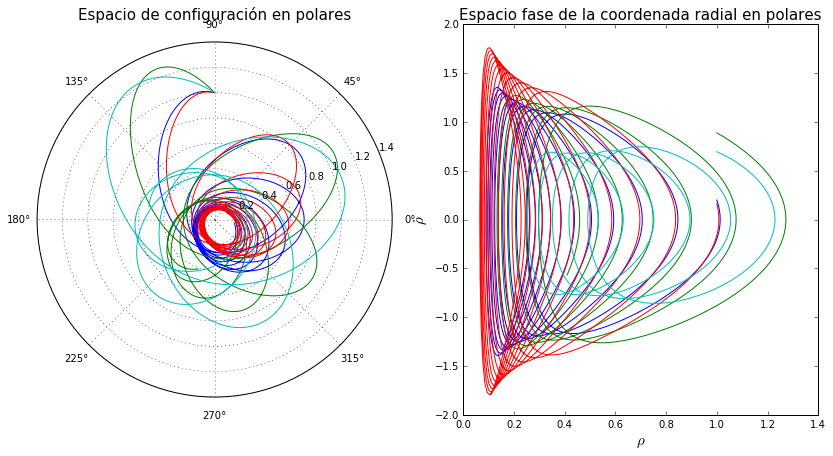

In [123]:
fig = figure(figsize=(14,7))
ax = fig.add_subplot(121, projection='polar')
bx = fig.add_subplot(122)

N = 11
for i in range(4):
    cond_ini = array([1., pi/2., random.rand(), 0.5+random.rand()])
    tiempo, sol = RK4(ec_dif2_polar, cond_ini, [0,N], 0.005, [1.,1.,1.,1.,0.05,0.05])
    # Se grafica el espacio de configuracion
    ax.plot(sol[:,1], sol[:,0])
    ax.set_title(u"Espacio de configuración en polares", fontsize=15)
    
    # Se grafica el espacio fase
    bx.plot(sol[:,0], sol[:,2])
    bx.set_title(u"Espacio fase de la coordenada radial en polares", fontsize=15)
    bx.set_xlabel("$\\rho$", fontsize=15)
    bx.set_ylabel("$\\dot \\rho$", fontsize=15)